In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.family"] = "serif"


In [33]:
dataset = pd.read_csv('UCS.csv')

In [34]:
print(dataset)

    Set  Temp  P Wave        Dt  ...      σm1      σm2  Avg (σm1, σm2)  FR
0     I    25    3866  0.000000  ...  0.00000  0.00000        0.000000 NaN
1     I    25    3895  0.000000  ...  0.00000  0.00000        0.000000 NaN
2     I    25    3852  0.000000  ...  0.00000  0.00000        0.000000 NaN
3     I   250    2768  0.487365  ...  0.00000  0.00000        0.000000 NaN
4     I   250    2768  0.494970  ...  0.00000  0.00000        0.000000 NaN
..  ...   ...     ...       ...  ...      ...      ...             ...  ..
85  III  1000    1393  0.863690  ...  0.05746  1.42134        0.739400 NaN
86  III  1000    1388  0.864667  ...  0.05746  1.42134        0.739400 NaN
87  III  1000    1397  0.863918  ...  0.03648  1.81851        0.927495 NaN
88  III  1000    1388  0.864667  ...  0.03648  1.81851        0.927495 NaN
89  III  1000    1378  0.866610  ...  0.03648  1.81851        0.927495 NaN

[90 rows x 11 columns]


In [35]:
X = dataset.iloc[ : , 0:7].values
y = dataset.iloc[ : , -2].values

In [36]:
print(y)

[0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.468535
 0.468535 0.475375 0.475375 0.264705 0.264705 0.111265 0.111265 0.29583
 0.29583  0.31441  0.31441  0.114    0.114    0.14866  0.14866  0.19437
 0.19437  0.401275 0.401275 0.31122  0.31122  0.358415 0.358415 0.164615
 0.164615 0.173395 0.173395 0.6767   0.6767   3.50124  3.50124  3.50124
 1.76562  1.76562  1.76562  3.925845 3.925845 3.925845 1.73518  1.73518
 1.73518  1.632015 1.632015 1.632015 1.054605 1.054605 1.054605 1.834705
 1.834705 1.834705 1.82271  1.82271  1.82271  2.027705 2.027705 2.027705
 1.31304  1.31304  1.31304  2.23438  2.23438  2.23438  1.18559  1.18559
 1.18559  0.603625 0.603625 0.603625 0.7394   0.7394   0.7394   0.927495
 0.927495 0.927495]


In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 0] = le.fit_transform(X[:, 0])

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 5] = le.fit_transform(X[:, 5])

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [40]:
ada=AdaBoostRegressor()
search_grid={'n_estimators':[50,100,500,1000,2000],'learning_rate':[.001,0.01,.1,1],'random_state':[1]}
search=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1)

In [41]:
search.fit(X_train,y_train)
search.best_params_

{'learning_rate': 0.01, 'n_estimators': 1000, 'random_state': 1}

In [42]:
model_ABR = AdaBoostRegressor(base_estimator=None, learning_rate=0.01, loss='linear', n_estimators=1000, random_state=None)
model_ABR.fit(X_train, y_train)
print(model_ABR)

AdaBoostRegressor(base_estimator=None, learning_rate=0.01, loss='linear',
                  n_estimators=1000, random_state=None)


In [43]:
expected_y  = y_test
predicted_y = model_ABR.predict(X_test)

In [44]:
print(predicted_y)

[0.         0.         3.412599   0.25770733 1.6726375  0.26008964
 2.23897091 0.25788118 1.6556525  0.80825375 0.         0.27258214
 0.25432333 1.67123533]


In [45]:
print(metrics.r2_score(expected_y, predicted_y))
print(metrics.mean_squared_log_error(expected_y, predicted_y))
print(metrics.mean_squared_error(expected_y, predicted_y))  


0.8903182020598173
0.019875448344354323
0.1685317667811325


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


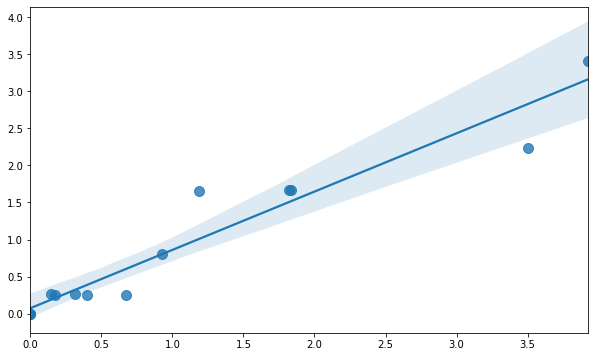

In [46]:
plt.figure(figsize=(10,6))
sns.regplot(expected_y, predicted_y, fit_reg=True, scatter_kws={"s": 100})

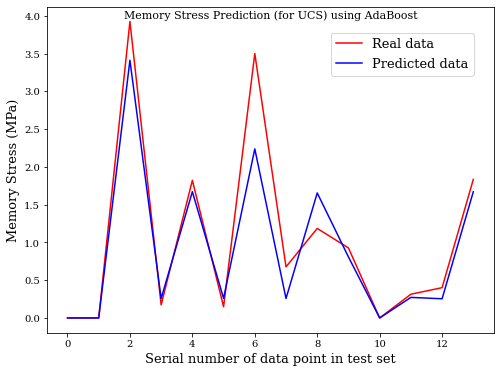

In [50]:
plt.figure(figsize=(8, 6))
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(predicted_y, color = 'blue', label = 'Predicted data')
plt.xlabel('Serial number of data point in test set', fontsize=13)
plt.ylabel('Memory Stress (MPa)',fontsize=13)
plt.title('Memory Stress Prediction (for UCS) using AdaBoost', position=(0.5, 0.945),size=11)
plt.legend(bbox_to_anchor=(0.97,0.94), fontsize=13)
plt.savefig("UCS (AdaBoost)",dpi=1500,bbox_inches = 'tight')
plt.show()